In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X = data[:, :34]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_scaled = X_train
X_test_scaled = X_test

from sklearn.linear_model import LogisticRegression
Lr1 = LogisticRegression(C = 0.6, penalty='l1', solver='liblinear', random_state=1)
Lr1.fit(X_train_scaled,y_train)
Lr2 = LogisticRegression(C = 0.3, penalty='l2', solver='liblinear', random_state=1)
Lr2.fit(X_train_scaled,y_train)

from sklearn.svm import LinearSVC
linear_svm_l1 = LinearSVC(C = 0.8, penalty="l1", dual=False)
linear_svm_l1.fit(X_train_scaled,y_train)
linear_svm_l2 = LinearSVC(C = 0.3, penalty="l2", dual=False)
linear_svm_l2.fit(X_train_scaled,y_train)

from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors = 7, metric='minkowski', algorithm='ball_tree')
estimator.fit(X_train_scaled, y_train)

from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(random_state = 1, max_features=16, max_depth=3, min_samples_leaf=2)
Tree.fit(X_train_scaled, y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, max_features=10, max_depth=3, min_samples_leaf=1, random_state=1)
forest.fit(X_train_scaled, y_train)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver="lbfgs", random_state = 1, activation='relu', alpha=0.12, max_iter=22, hidden_layer_sizes=21)
mlp.fit(X_train_scaled, y_train)

from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(random_state = 1, learning_rate=0.2, n_estimators=15, subsample=0.4)
boosting.fit(X_train_scaled, y_train)

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(copy=True, feature_range=(0,1))
MMS.fit(X_train)
X_train_scaled2 = MMS.transform(X_train)
X_test_scaled2 = MMS.transform(X_test)
multinomialnb = MultinomialNB(fit_prior=True, alpha=0.001)
multinomialnb.fit(X_train_scaled2, y_train)


c:\program files\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [2]:
import pandas as pd
params = ['method','train_score', 'test_score']
resuts = []
resuts.append(['LinearSVCL1', np.around(linear_svm_l1.score(X_train_scaled, y_train)*100, decimals=3), np.around(linear_svm_l1.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['LinearSVCL2', np.around(linear_svm_l2.score(X_train_scaled, y_train)*100, decimals=3), np.around(linear_svm_l2.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['LogisticRegressionL1', np.around(Lr1.score(X_train_scaled, y_train)*100, decimals=3), np.around(Lr1.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['LogisticRegressionL2', np.around(Lr2.score(X_train_scaled, y_train)*100, decimals=3), np.around(Lr2.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['KNeighborsClassifier', np.around(estimator.score(X_train_scaled, y_train)*100, decimals=3), np.around(estimator.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['DecisionTreeClassifier', np.around(Tree.score(X_train_scaled, y_train)*100, decimals=3), np.around(Tree.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['RandomForestClassifier', np.around(forest.score(X_train_scaled, y_train)*100, decimals=3), np.around(forest.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['MLPClassifier', np.around(mlp.score(X_train_scaled, y_train)*100, decimals=3), np.around(mlp.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['GradientBoostingClassifier', np.around(boosting.score(X_train_scaled, y_train)*100, decimals=3), np.around(boosting.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['MultinomialNB', np.around(multinomialnb.score(X_train_scaled2, y_train)*100, decimals=3), np.around(multinomialnb.score(X_test_scaled2, y_test)*100, decimals=3)])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)

import matplotlib.pyplot as plt

# def plot_features_importance_cancer(model):
#     plt.barh(range(34), model.feature_importances_, align = 'center')
#     plt.yticks(np.arange(34), ionosphere.names)
#     plt.xlabel("Важность признака")
#     plt.ylabel("Признак")
# plot_features_importance_cancer(forest)

method train_score test_score
0                 LinearSVCL1      93.536     88.636
1                 LinearSVCL2      93.536       87.5
2        LogisticRegressionL1      91.255       87.5
3        LogisticRegressionL2      89.734     86.364
4        KNeighborsClassifier       82.89     85.227
5      DecisionTreeClassifier      92.395     92.045
6      RandomForestClassifier      95.817     95.455
7               MLPClassifier      98.859     94.318
8  GradientBoostingClassifier      97.719     97.727
9               MultinomialNB      67.681     63.636

In [3]:
import pandas as pd

resuts = []
y_test2 = y_test

#svc = np.array(np.around(linear_svm_l1.predict_proba(X_test_scaled), decimals=3))
#svcc = svc.reshape(2,16)
#svc2 = np.array(np.around(linear_svm_l2.predict_proba(X_test_scaled), decimals=3))
#svcc2 = svc.reshape(2,16)
lr1 = np.array(np.around(Lr1.predict_proba(X_test_scaled), decimals=3))
lrr1 = lr1.transpose()
lr2 = np.array(np.around(Lr2.predict_proba(X_test_scaled), decimals=3))
lrr2 = lr2.transpose()
est = np.array(np.around(estimator.predict_proba(X_test_scaled), decimals=3))
estt = est.transpose()
tre = np.array(np.around(Tree.predict_proba(X_test_scaled), decimals=3))
tree = tre.transpose()
frt = np.array(np.around(forest.predict_proba(X_test_scaled), decimals=3))
frtt = frt.transpose()
mlpa = np.array(np.around(mlp.predict_proba(X_test_scaled), decimals=3))
mlpaa = mlpa.transpose()
bst = np.array(np.around(boosting.predict_proba(X_test_scaled), decimals=3))
bstt = bst.transpose()
nb = np.array(np.around(multinomialnb.predict_proba(X_test_scaled2), decimals=3))
nbb = nb.transpose()

resuts.append(y_test2)
resuts.append(lrr1[0])
resuts.append(lrr2[0])
resuts.append(estt[0])
resuts.append(tree[0])
resuts.append(frtt[0])
resuts.append(mlpaa[0])
resuts.append(bstt[0])
resuts.append(nbb[0])


resuts.append(lrr1[1])
resuts.append(lrr2[1])
resuts.append(estt[1])
resuts.append(tree[1])
resuts.append(frtt[1])
resuts.append(mlpaa[1])
resuts.append(bstt[1])
resuts.append(nbb[1])


np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts, index=['y_test','LogisticRegressionL1(=0)','LogisticRegressionL2(=0)','KNeighbors(=0)','DecisionTree(=0)','RandomForest(=0)', 'MLP(=0)','GradientBoosting(=0)', 'MultinomialNB(=0)',
                                                  'LogisticRegressionL1(=1)','LogisticRegressionL2(=1)','KNeighbors(=1)','DecisionTree(=1)','RandomForest(=1)', 'MLP(=1)','GradientBoosting(=1)', 'MultinomialNB(=1)'])
#data_pd.columns = params
display(data_pd)

0      1      2      3      4      5      6   \
y_test                    0.000  0.000  0.000  1.000  0.000  0.000  0.000   
LogisticRegressionL1(=0)  0.732  0.882  0.966  0.875  0.849  0.764  0.648   
LogisticRegressionL2(=0)  0.767  0.857  0.944  0.861  0.831  0.762  0.707   
KNeighbors(=0)            1.000  1.000  1.000  1.000  1.000  1.000  1.000   
DecisionTree(=0)          0.941  0.941  0.941  0.941  0.941  0.941  0.941   
RandomForest(=0)          0.828  0.880  0.917  0.917  0.917  0.917  0.864   
MLP(=0)                   0.978  0.997  1.000  0.414  0.997  0.998  0.963   
GradientBoosting(=0)      0.907  0.966  0.954  0.499  0.956  0.747  0.738   
MultinomialNB(=0)         0.672  0.693  0.733  0.662  0.684  0.674  0.670   
LogisticRegressionL1(=1)  0.268  0.118  0.034  0.125  0.151  0.236  0.352   
LogisticRegressionL2(=1)  0.233  0.143  0.056  0.139  0.169  0.238  0.293   
KNeighbors(=1)            0.000  0.000  0.000  0.000  0.000  0.000  0.000   
DecisionTree(=1)          0.059  0.059  0.059  0.059  0.059  0.059  0.059   
RandomForest(=1)          0.172  0.120  0.083  0.083  0.083  0.083  0.136   
MLP(=1)                   0.022  0.003  0.000  0.586  0.003  0.002  0.037   
GradientBoosting(=1)      0.093  0.034  0.046  0.501  0.044  0.253  0.262   
MultinomialNB(=1)         0.328  0.307  0.267  0.338  0.316  0.326  0.330   

                             7      8      9   ...     78     79     80  \
y_test                    0.000  0.000  0.000  ...  1.000  0.000  0.000   
LogisticRegressionL1(=0)  0.956  0.903  0.929  ...  0.591  0.973  0.959   
LogisticRegressionL2(=0)  0.931  0.881  0.890  ...  0.742  0.957  0.955   
KNeighbors(=0)            1.000  1.000  1.000  ...  0.429  1.000  1.000   
DecisionTree(=0)          0.941  0.941  0.941  ...  0.000  0.941  0.941   
RandomForest(=0)          0.917  0.917  0.897  ...  0.000  0.917  0.826   
MLP(=0)                   1.000  0.961  1.000  ...  0.024  1.000  0.999   
GradientBoosting(=0)      0.954  0.965  0.947  ...  0.158  0.954  0.739   
MultinomialNB(=0)         0.712  0.579  0.659  ...  0.718  0.749  0.638   
LogisticRegressionL1(=1)  0.044  0.097  0.071  ...  0.409  0.027  0.041   
LogisticRegressionL2(=1)  0.069  0.119  0.110  ...  0.258  0.043  0.045   
KNeighbors(=1)            0.000  0.000  0.000  ...  0.571  0.000  0.000   
DecisionTree(=1)          0.059  0.059  0.059  ...  1.000  0.059  0.059   
RandomForest(=1)          0.083  0.083  0.103  ...  1.000  0.083  0.174   
MLP(=1)                   0.000  0.039  0.000  ...  0.976  0.000  0.001   
GradientBoosting(=1)      0.046  0.035  0.053  ...  0.842  0.046  0.261   
MultinomialNB(=1)         0.288  0.421  0.341  ...  0.282  0.251  0.362   

                             81     82     83     84     85     86     87  
y_test                    0.000  0.000  0.000  0.000  0.000  0.000  1.000  
LogisticRegressionL1(=0)  0.438  0.963  0.950  0.922  0.940  0.915  0.019  
LogisticRegressionL2(=0)  0.524  0.940  0.920  0.902  0.916  0.891  0.090  
KNeighbors(=0)            1.000  1.000  1.000  1.000  1.000  1.000  0.143  
DecisionTree(=0)          0.941  0.941  0.941  0.941  0.941  0.941  0.000  
RandomForest(=0)          0.710  0.917  0.917  0.917  0.917  0.917  0.003  
MLP(=0)                   0.425  1.000  0.999  0.966  0.999  0.999  0.000  
GradientBoosting(=0)      0.810  0.954  0.966  0.965  0.979  0.966  0.042  
MultinomialNB(=0)         0.639  0.723  0.730  0.571  0.636  0.690  0.550  
LogisticRegressionL1(=1)  0.562  0.037  0.050  0.078  0.060  0.085  0.981  
LogisticRegressionL2(=1)  0.476  0.060  0.080  0.098  0.084  0.109  0.910  
KNeighbors(=1)            0.000  0.000  0.000  0.000  0.000  0.000  0.857  
DecisionTree(=1)          0.059  0.059  0.059  0.059  0.059  0.059  1.000  
RandomForest(=1)          0.290  0.083  0.083  0.083  0.083  0.083  0.997  
MLP(=1)                   0.575  0.000  0.001  0.034  0.001  0.001  1.000  
GradientBoosting(=1)      0.190  0.046  0.034  0.035  0.021  0.034  0.958  

In [4]:
#------------------------------------------------------------------------

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

data = np.loadtxt('ionosphere.csv', delimiter=';', unpack=False)
X2 = data[:, :34]
y2 = data[:, 34:35]
y2 = y2.reshape(351)

pca = PCA(n_components=13)
pca.fit(X2)
X_pca = pca.transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y2, random_state=42)

# Нормализация (стандартизация данных)
mean_on_train = X_train2.mean(axis = 0)
std_on_train = X_train2.std(axis = 0)
X_train_scaled2 = (X_train2 - mean_on_train)/std_on_train
X_test_scaled2 = (X_test2 - mean_on_train)/std_on_train

from sklearn.linear_model import LogisticRegression
Lr1_pca = LogisticRegression(C = 0.6, penalty='l1', solver='liblinear', random_state=1)
Lr1_pca.fit(X_train_scaled2,y_train2)
Lr2_pca = LogisticRegression(C = 0.3, penalty='l2', solver='liblinear', random_state=1)
Lr2_pca.fit(X_train_scaled2,y_train2)

from sklearn.svm import LinearSVC
linear_svm_l1_pca = LinearSVC(C = 0.8, penalty="l1", dual=False)
linear_svm_l1_pca.fit(X_train_scaled2,y_train2)
linear_svm_l2_pca = LinearSVC(C = 0.3, penalty="l2", dual=False)
linear_svm_l2_pca.fit(X_train_scaled2,y_train2)

from sklearn.neighbors import KNeighborsClassifier
estimator_pca = KNeighborsClassifier(n_neighbors = 7, metric='minkowski', algorithm='ball_tree')
estimator_pca.fit(X_train_scaled2, y_train2)

from sklearn.tree import DecisionTreeClassifier
Tree_pca = DecisionTreeClassifier(random_state = 1, max_features=10, max_depth=3, min_samples_leaf=2)
Tree_pca.fit(X_train_scaled2, y_train2)

from sklearn.ensemble import RandomForestClassifier
forest_pca = RandomForestClassifier(n_estimators=10, max_features=10, max_depth=3, min_samples_leaf=1, random_state=1)
forest_pca.fit(X_train_scaled2, y_train2)

from sklearn.neural_network import MLPClassifier
mlp_pca = MLPClassifier(solver="lbfgs", random_state = 1, activation='relu', alpha=0.12, max_iter=22, hidden_layer_sizes=21)
mlp_pca.fit(X_train_scaled2, y_train2)

from sklearn.ensemble import GradientBoostingClassifier
boosting_pca = GradientBoostingClassifier(random_state = 1, learning_rate=0.2, n_estimators=15, subsample=0.4)
boosting_pca.fit(X_train_scaled2, y_train2)

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
MMS_pca = MinMaxScaler(copy=True, feature_range=(0,1))
MMS_pca.fit(X_train2)
X_train_scaled3 = MMS_pca.transform(X_train2)
X_test_scaled3 = MMS_pca.transform(X_test2)
multinomialnb_pca = MultinomialNB(fit_prior=True, alpha=0.001)
multinomialnb_pca.fit(X_train_scaled3, y_train2)

# import mglearn
# import matplotlib.pyplot as plt
# mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y2)
# plt.xlabel("Компонента_0_pca")
# plt.ylabel("Компонента_1_pca")
# plt.legend(["Класс_0","Класс_1"])

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [5]:
import pandas as pd
params = ['method','train_score', 'test_score', 'test_profit']
resuts = []
resuts.append(['LinearSVCL1_pca', np.around(linear_svm_l1_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(linear_svm_l1_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(linear_svm_l1_pca.score(X_test_scaled2, y_test2)*100-linear_svm_l1.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['LinearSVCL2_pca', np.around(linear_svm_l2_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(linear_svm_l2_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(linear_svm_l2_pca.score(X_test_scaled2, y_test2)*100-linear_svm_l2.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['LogisticRegressionL1_pca', np.around(Lr1_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(Lr1_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(Lr1_pca.score(X_test_scaled2, y_test2)*100-Lr1.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['LogisticRegressionL2_pca', np.around(Lr2_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(Lr2_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(Lr2_pca.score(X_test_scaled2, y_test2)*100-Lr2.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['KNeighborsClassifier_pca', np.around(estimator_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(estimator_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(estimator_pca.score(X_test_scaled2, y_test2)*100-estimator.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['DecisionTreeClassifier_pca', np.around(Tree_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(Tree_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(Tree_pca.score(X_test_scaled2, y_test2)*100-Tree.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['RandomForestClassifier_pca', np.around(forest_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(forest_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(forest_pca.score(X_test_scaled2, y_test2)*100-forest.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['MLPClassifier_pca', np.around(mlp_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(mlp_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(mlp_pca.score(X_test_scaled2, y_test2)*100-mlp.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['GradientBoostingClassifier_pca', np.around(boosting_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(boosting_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(boosting_pca.score(X_test_scaled2, y_test2)*100-boosting.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['MultinomialNB_pca', np.around(multinomialnb_pca.score(X_train_scaled3, y_train2)*100, decimals=3), np.around(multinomialnb_pca.score(X_test_scaled3, y_test2)*100, decimals=3), np.around(multinomialnb_pca.score(X_test_scaled3, y_test2)*100-multinomialnb_pca.score(X_test_scaled3, y_test2)*100, decimals=3)])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)


method train_score test_score test_profit
0                 LinearSVCL1_pca      88.973     89.773       1.136
1                 LinearSVCL2_pca      88.973     88.636       1.136
2        LogisticRegressionL1_pca      88.213     89.773       2.273
3        LogisticRegressionL2_pca      88.973     88.636       2.273
4        KNeighborsClassifier_pca      88.593     88.636       3.409
5      DecisionTreeClassifier_pca      92.395     90.909      -1.136
6      RandomForestClassifier_pca      95.437     93.182      -2.273
7               MLPClassifier_pca       99.62     92.045      -2.273
8  GradientBoostingClassifier_pca      98.099     94.318      -3.409
9               MultinomialNB_pca      64.259     63.636         0.0

[[56  0]
 [18 14]]


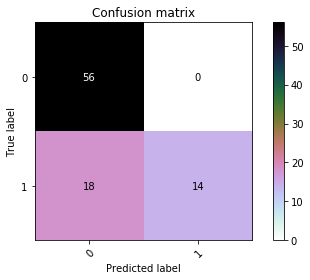

In [6]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

# y_pred = Lr1_pca.predict(X_test_scaled2)
# y_pred = boosting_pca.predict(X_test_scaled2)
# y_pred = forest_pca.predict(X_test_scaled2)
y_pred = multinomialnb_pca.predict(X_test_scaled2)




# Построение матрицы путаницы
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.cubehelix_r):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)


# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=[0,1])

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

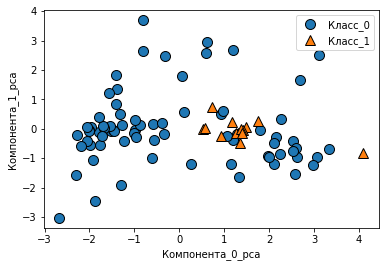

In [7]:
import mglearn
import matplotlib.pyplot as plt
print(y2)
print(y_pred)
mglearn.discrete_scatter(X_test2[:,0], X_test2[:,1], y_pred)
plt.xlabel("Компонента_0_pca")
plt.ylabel("Компонента_1_pca")
plt.legend(["Класс_0","Класс_1"])

In [8]:
import pandas as pd
params = ['method','train_score', 'test_score', 'test_profit']
resuts = []
resuts.append(['RandomForestClassifier_pca', np.around(forest_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(forest_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(forest_pca.score(X_test_scaled2, y_test2)*100-forest.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['MLPClassifier_pca', np.around(mlp_pca.score(X_train_scaled2, y_train2)*100, decimals=3), np.around(mlp_pca.score(X_test_scaled2, y_test2)*100, decimals=3), np.around(mlp_pca.score(X_test_scaled2, y_test2)*100-mlp.score(X_test_scaled, y_test)*100, decimals=3)])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)

method train_score test_score test_profit
0  RandomForestClassifier_pca      95.437     93.182      -2.273
1           MLPClassifier_pca       99.62     92.045      -2.273

In [14]:
import pandas as pd
params = ['method','train_score', 'test_score', 'params']
resuts = []
resuts.append(['RandomForestClassifier', np.around(forest.score(X_train_scaled, y_train)*100, decimals=3), np.around(forest.score(X_test_scaled, y_test)*100, decimals=3), 'n_estimators=10, max_features=10, max_depth=3, min_samples_leaf=1'])
resuts.append(['MLPClassifier', np.around(mlp.score(X_train_scaled, y_train)*100, decimals=3), np.around(mlp.score(X_test_scaled, y_test)*100, decimals=3), 'solver="lbfgs", activation="relu", alpha=0.12, max_iter=22, hidden_layer_sizes=21'])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)

import matplotlib.pyplot as plt


method train_score test_score  \
0  RandomForestClassifier       99.62     94.318   
1           MLPClassifier      97.719     90.909   

                                              params  
0  n_estimators=10, max_features=10 /n, max_depth...  
1  solver="lbfgs", activation="relu", alpha=0.12,...

In [11]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train_scaled, y_train)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 1)
mlp.fit(X_train_scaled, y_train)

params = ['method','train_score', 'test_score']
resuts = []
resuts.append(['RandomForestClassifier', np.around(forest.score(X_train_scaled, y_train)*100, decimals=3), np.around(forest.score(X_test_scaled, y_test)*100, decimals=3)])
resuts.append(['MLPClassifier', np.around(mlp.score(X_train_scaled, y_train)*100, decimals=3), np.around(mlp.score(X_test_scaled, y_test)*100, decimals=3)])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)

import matplotlib.pyplot as plt


c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


method train_score test_score
0  RandomForestClassifier       99.62     94.318
1           MLPClassifier      97.719     90.909